# Vertical transmission: Sobol sensitivity analysis

In [1]:
from SALib.sample import saltelli, fast_sampler
import pandas as pd
from Sensitivity import Sensitivity
import joblib

model_path = "../models/BMI-SNP/"
output_path = "../output/data/"
plots_path = "../output/plots/"

In [2]:
# parameter dictionary
problem = {
    'num_vars': 3,
    'names': ['random-mating', 'vertical-trasmission-variance', 'fertility-differential'],
    'bounds': [[0, 1.0],
               [0, 0.50],
               [0, 0.30]]
}

In [3]:
sample_parameters = False
if (sample_parameters):
    param_values = saltelli.sample(problem, 2**11)
    t = pd.DataFrame(param_values)
    t.columns = ['random-mating', 'vertical-transmission', 'fertility-differential']
    t.to_csv(model_path + "data/param-vt-sobol-test.csv", index=False)
else:
    t = pd.read_csv(model_path + "data/param-vt-sobol-test.csv")
len(t)

t.describe()

random-mating  vertical-transmission  fertility-differential
count   16384.000000           16384.000000            16384.000000
mean        0.500000               0.250000                0.150000
std         0.288684               0.144342                0.086605
min         0.000244               0.000122                0.000073
25%         0.250122               0.125061                0.075037
50%         0.500000               0.250000                0.150000
75%         0.749878               0.374939                0.224963
max         0.999756               0.499878                0.299927

In [4]:
# read data
df = pd.read_csv(output_path + "results-vt-sobol-test.csv", sep = ";")
print(df.shape)
cols = df.bmi_category_prop.str.replace(r'\[|\]', '').str.split(",", n=4, expand=True)
colnames = ['g'+str(i+1) for i in range(4)]
cols.columns = colnames
cols = cols[colnames].apply(pd.to_numeric)
df = pd.concat([df, cols], axis=1, ignore_index=False)
params = pd.read_csv(output_path + "param-vt-sobol-test.csv", sep = ";")
df = df.merge(params, on = ["iteration", "replicate"])
df["iteration"] = pd.to_numeric(df["iteration"])
df = df.sort_values(by=['iteration'])
df = df.loc[df["iteration"] <= len(t),:]

# select parameters
vars = ['p_fertility_factor', 'p_random_mating', 'p_vertical_trans_variance']
X = df.loc[:,vars]
X.head()

(16384, 13)


/var/folders/36/wsfqn0_j2ng6r0b58wc559fc0000gn/T/ipykernel_27174/4166787651.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  cols = df.bmi_category_prop.str.replace(r'\[|\]', '').str.split(",", n=4, expand=True)


p_fertility_factor  p_random_mating  p_vertical_trans_variance
0                0.220239         0.000732                    0.15686
7496             0.220239         0.746826                    0.15686
8607             0.220239         0.000732                    0.15979
9718             0.220679         0.000732                    0.15686
10829            0.220679         0.000732                    0.15979

## Proportion obese

                                     ST   ST_conf
random-mating                  0.215170  0.030186
vertical-trasmission-variance  0.926230  0.097104
fertility-differential         0.179633  0.028490
                                     S1   S1_conf
random-mating                  0.062095  0.027143
vertical-trasmission-variance  0.674691  0.077720
fertility-differential         0.030507  0.027652
                                                          S2   S2_conf
(random-mating, vertical-trasmission-variance)      0.032591  0.070426
(random-mating, fertility-differential)             0.020430  0.042553
(vertical-trasmission-variance, fertility-diffe...  0.107171  0.121112


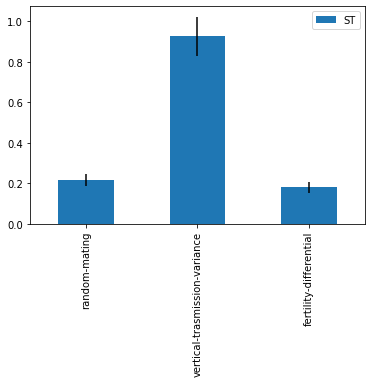

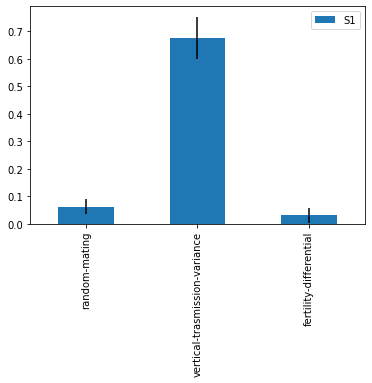

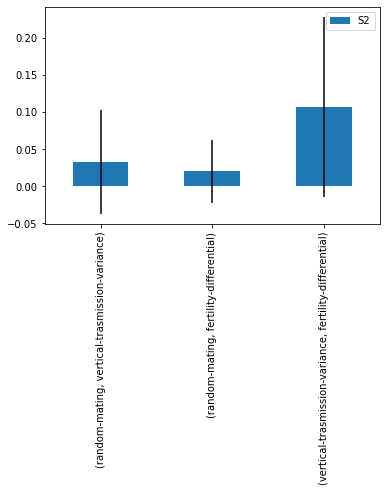

In [5]:
sb = Sensitivity(problem, df['g4'], X)
sb.score('sobol')
sb.plot(save=True, filepath= plots_path + 'vt-sobol-prop-obese-test.pdf',
    move=True, moving_path= '../manuscript/plots/')
sb.plot3D(labels={'outcome':'obese', 'y':'random mating', 'x':'fertility', 'z':'vertical transmission'})
sav = {
    'sb_obese_s1': sb.tabval('S1'),
    'sb_obese_s2': sb.tabval('S2'),
    'sb_obese_st': sb.tabval('ST')
}

## Average BMI

                                     ST   ST_conf
random-mating                  0.169462  0.022193
vertical-trasmission-variance  0.924601  0.106535
fertility-differential         0.358077  0.052069
                                     S1   S1_conf
random-mating                  0.010710  0.028724
vertical-trasmission-variance  0.598424  0.074254
fertility-differential         0.088814  0.045284
                                                          S2   S2_conf
(random-mating, vertical-trasmission-variance)     -0.043212  0.086281
(random-mating, fertility-differential)             0.019941  0.043986
(vertical-trasmission-variance, fertility-diffe...  0.175430  0.129600


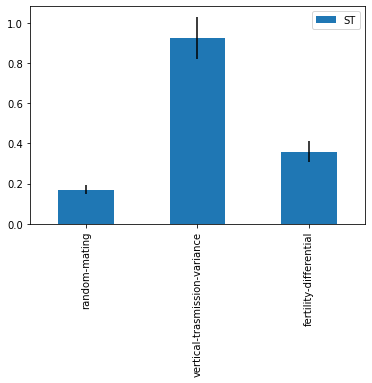

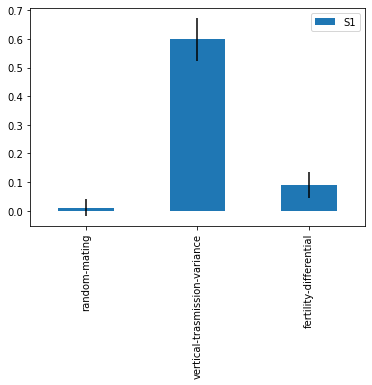

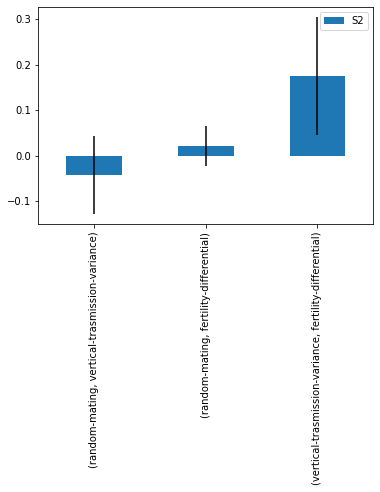

In [6]:
sb = Sensitivity(problem, df['average_bmi'], X)
sb.score('sobol')
sb.plot(save=True, filepath= plots_path + 'vt-sobol-average-bmi-test.pdf',
    move=True, moving_path= '../manuscript/plots/')
sb.plot3D(labels={'outcome':'obese', 'y':'random mating', 'x':'fertility', 'z':'vertical transmission'})

sav['sb_average_s1'] =  sb.tabval('S1')
sav['sb_average_s2'] =  sb.tabval('S2')
sav['sb_average_st'] =  sb.tabval('ST')

## SD BMI

                                     ST   ST_conf
random-mating                  0.410192  0.049046
vertical-trasmission-variance  0.779011  0.060435
fertility-differential         0.054417  0.005861
                                     S1   S1_conf
random-mating                  0.200876  0.035854
vertical-trasmission-variance  0.592587  0.062681
fertility-differential        -0.002971  0.014635
                                                          S2   S2_conf
(random-mating, vertical-trasmission-variance)      0.144595  0.071782
(random-mating, fertility-differential)             0.020381  0.052341
(vertical-trasmission-variance, fertility-diffe...  0.011075  0.087947


['sobol-vt.pkl']

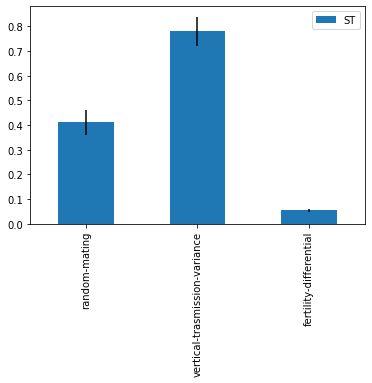

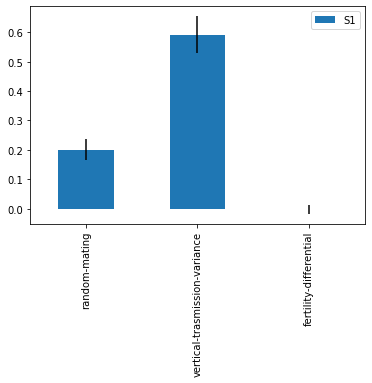

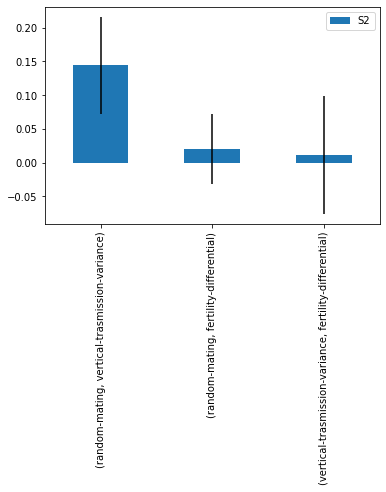

In [7]:
sb = Sensitivity(problem, df['sd_bmi'], X)
sb.score('sobol')
sb.plot(save=True, filepath= plots_path + 'vt-sobol-sd-bmi-test.pdf',
    move=True, moving_path= '../manuscript/plots/')
sb.plot3D(labels={'outcome':'obese', 'y':'random mating', 'x':'fertility', 'z':'vertical transmission'})

sav['sb_sd_s1'] =  sb.tabval('S1')
sav['sb_sd_s2'] =  sb.tabval('S2')
sav['sb_sd_st'] =  sb.tabval('ST')

# save output
v = sb.createRows(sav, g=['s1', 's2', 'st'])
joblib.dump(v, 'sobol-vt.pkl')